# Clustering Day 2 - Exercises

## Exercise 1

#### Question 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the directory and the plot directory

In [4]:
main_dir = '/Users/datasociety/Desktop/af-werx'
data_dir = main_dir + "/data"
plot_dir = main_dir + "/plot"
print(data_dir)
print(plot_dir)

/Users/datasociety/Desktop/af-werx/data
/Users/datasociety/Desktop/af-werx/plot


In [50]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
np.set_printoptions(suppress=True) #<- suppress scientific notations

In [5]:
# Set working directory.
os.chdir(data_dir)
# Check working directory.
os.getcwd()

'/Users/datasociety/Desktop/af-werx/data'

#### Answer:

#### Question 2

##### Load the dataset `fast_food_data.csv` and save it as `ex_subset`.

##### Print the first few rows of `ex_subset` and its summary.

##### Drop all the non-numerical columns and unnecessary columns (`Revenue` and `Serving Size`)

##### Check how many NAs are in each column and impute them with mean.

In [18]:
ex_subset = pd.read_csv("fast_food_data.csv")
ex_subset.head()

,Fast Food Restaurant,Item,Type,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),Revenue 2016 (billion dollars)
0,McDonald's,Hamburger,Burger,98,240,8.0,3.0,0.0,480,32.0,6.0,12.0,36.4
1,McDonald's,Cheeseburger,Burger,113,290,11.0,5.0,0.5,680,33.0,7.0,15.0,36.4
2,McDonald's,Big Mac,Burger,211,530,27.0,10.0,1.0,960,47.0,9.0,24.0,36.4
3,McDonald's,Quarter Pounder with Cheese,Burger,202,520,26.0,12.0,1.5,1100,41.0,10.0,30.0,36.4
4,McDonald's,Bacon Clubhouse Burger,Burger,270,720,40.0,15.0,1.5,1470,51.0,14.0,39.0,36.4


In [19]:
ex_subset = ex_subset.select_dtypes(['number'])
ex_subset = ex_subset.drop(columns=['Revenue 2016 (billion dollars)', 'Serving Size (g)'])

In [20]:
print(ex_subset.isnull().sum())

Calories              0
Total Fat (g)         0
Saturated Fat (g)     0
Trans Fat (g)        12
Sodium (mg)           0
Carbs (g)             0
Sugars (g)            0
Protein (g)           0
dtype: int64


In [90]:
ex_subset = ex_subset.fillna(ex_subset.mean())
print(ex_subset.isnull().sum())
print(ex_subset.dtypes)

Calories             0
Total Fat (g)        0
Saturated Fat (g)    0
Trans Fat (g)        0
Sodium (mg)          0
Carbs (g)            0
Sugars (g)           0
Protein (g)          0
dtype: int64
Calories               int64
Total Fat (g)        float64
Saturated Fat (g)    float64
Trans Fat (g)        float64
Sodium (mg)            int64
Carbs (g)            float64
Sugars (g)           float64
Protein (g)          float64
dtype: object


#### Answer:

#### Question 3
##### For clustering, we will be using just the `Calories` and `Sodium (mg)` columns. Drop all the other columns from `ex_subset` 
##### Name the newly subsetted dataframe as `ex_cluster`.
##### Make sure that all the variables in `ex_cluster` are numeric.

In [21]:
ex_cluster = ex_subset[['Calories','Sodium (mg)']]
ex_cluster.head()
ex_cluster.dtypes

Calories       int64
Sodium (mg)    int64
dtype: object

#### Answer:

#### Question 4
##### Scale `ex_cluster` using the `StandardScaler` function.
##### Name the scaled dataframe as `ex_cluster_scaled`. 
##### Convert `ex_cluster_scaled` back to a Pandas dataframe and make sure that the column names are the same as before.

In [23]:
# Instantiate Scaler.
ex_scaler = StandardScaler()

# Scale the dataframe.
ex_cluster_scaled = ex_scaler.fit_transform(ex_cluster)
# Convert back to dataframe, making sure to name the columns again.
ex_cluster_scaled = pd.DataFrame(ex_cluster_scaled, columns = ex_cluster.columns)
ex_cluster_scaled.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Calories,Sodium (mg)
0,-1.170685,-0.947089
1,-0.970563,-0.563455
2,-0.009974,-0.026367
3,-0.049999,0.242177
4,0.750491,0.951900


#### Answer:

#### Question 5
#####  Rename `ex_cluster_scaled` as `ex_db`.
##### We will be using `ex_cluster_scaled` in other clustering models as well.
##### Plot the two variables from `ex_kmeans` to see their interactions. 
##### Plot `Sodium (mg)` as `y` and `Calories` as `x`.

In [24]:
ex_db = ex_cluster_scaled

Text(0, 0.5, 'Sodium (mg)')

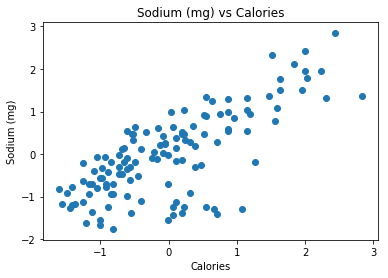

In [27]:
plt.scatter(ex_db['Calories'],
            ex_db['Sodium (mg)'])

plt.title('Sodium (mg) vs Calories')
plt.xlabel('Calories')
plt.ylabel('Sodium (mg)')

#### Answer:

#### Question 6
##### Run the DBSCAN model on `ex_db`.
##### For now, we set ϵ to have a radius of 0.8.
##### We set MinPts (min_samples in the function) to 4.
##### That means that we want 4 samples in a neighborhood of radius 0.8.
##### Plot the cluster assignments.

In [41]:
dbscan = DBSCAN(eps=0.3, min_samples = 4)
ex_clusters = dbscan.fit_predict(ex_db)

Text(0, 0.5, 'Sodium (mg)')

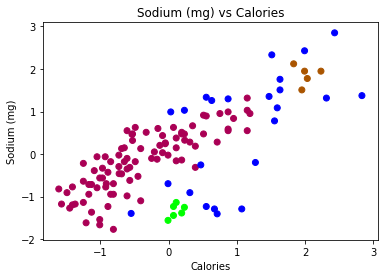

In [42]:
plt.scatter(
    ex_db['Calories'],
    ex_db['Sodium (mg)'],
    c = ex_clusters,
    cmap = "brg",
    label='True Position'
)

plt.title('Sodium (mg) vs Calories')
plt.xlabel('Calories')
plt.ylabel('Sodium (mg)')

#### Answer:

## Exercise 2

#### Question 1
##### Optimize eps and MinPts.
##### Plot the kNN distance to obtain the optimal parameters.

In [43]:
# Let's define the parameters needed for the functions.
n_trainingData = 0          # amount of training data evaluated using KNNdistPlot
labels = 0                  # array containing the labels of every point on the plane
n_clusters = 0              # number of clusters


def Get_distanceMean(points,minPts,previous_distanceMean):
    """
        points: list containing the training points you want to use
        minPts: minimum number of points to be considered a cluster
        previous_distanceMean: the previous mean of the distances
        return: average distance between the points
    """        
    if (minPts < len(points)):
        nbrs = NearestNeighbors(n_neighbors=minPts).fit(points)
        distances, indices = nbrs.kneighbors(points)
        d_mean = distances.mean()
        return d_mean
    else:
        return previous_distanceMean


In [44]:
def KNNdist_plot(points,minPts):
        # set trace for dubugging
        #import pdb; pdb.set_trace() 
        epsPlot = []
        current_distanceMean = previous_distanceMean = 0
        knee_value = knee_found = 0
    
        for i in range (0,len(points), 5):
            current_distanceMean = Get_distanceMean(points[i:],minPts,previous_distanceMean)
            df = current_distanceMean - previous_distanceMean
            
            if ((df > 0.02) & (i > 1) & (knee_found == 0)):
                knee_value = current_distanceMean
                knee_found = 1
                n_trainingData = i
                
            epsPlot.append( [i,current_distanceMean] )
            previous_distanceMean = current_distanceMean
        
        # Plot the kNNdistPlot.
        for i in range(0, len(epsPlot)):
                    plt.scatter(epsPlot[i][0],
                                epsPlot[i][1],c='r',
                                s=3,
                                marker='o')
        plt.axhline(y=knee_value, color='g', linestyle='-')
        plt.axvline(x=n_trainingData , color='g', linestyle='-')
        plt.title("kNN distance")
        plt.show()
        print("Knee value: x=" + str(n_trainingData) + " , y=" + str(knee_value))
        print("Optimal eps value:" + str(knee_value))
        return knee_value

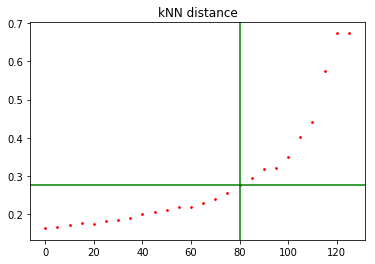

Knee value: x=80 , y=0.27666285644560534
Optimal eps value:0.27666285644560534


In [51]:
knee_v = KNNdist_plot(ex_cluster_scaled, 4)

#### Answer:

#### Question 2
##### Run a new DBSCAN analysis with the optimized parameters.
##### Plot the cluster assignments.

In [48]:
# DBSCAN
dbscan = DBSCAN(eps=knee_v, min_samples = 3)
optimized_clusters = dbscan.fit_predict(ex_cluster_scaled)

Text(0, 0.5, 'Sodium (mg)')

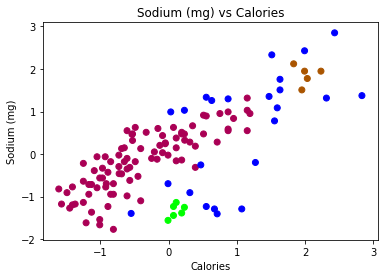

In [49]:
plt.scatter(
    ex_db['Calories'],
    ex_db['Sodium (mg)'],
    c = ex_clusters,
    cmap = "brg",
    label='True Position'
)

plt.title('Sodium (mg) vs Calories')
plt.xlabel('Calories')
plt.ylabel('Sodium (mg)')

#### Answer:

## Exercise 3

#### Question 1
##### Take a look at the correlation matrix of the variables and name the matrix as `ex_corr`.
##### Also visualize the correlation plot. 

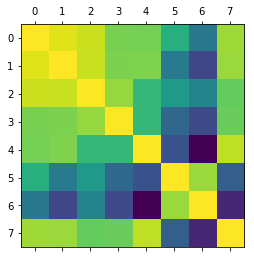

In [247]:
ex_corr = ex_subset.corr()
plt.matshow(ex_corr)
plt.show()

#### Answer:

#### Question 2
##### Split `ex_subset` into predictors and target variable and name them `ex_X` and `ex_y`.
##### We will be using `Calories` as the target variable.

In [248]:
ex_y = ex_subset[['Calories']]
ex_X = ex_subset.drop(['Calories'], axis = 1)
ex_scaled = ex_X

#### Question 3
##### Scale the predictors `ex_X`.

In [249]:
ex_sc = StandardScaler()
ex_X = ex_sc.fit_transform(ex_X)
ex_X

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.13077685, -0.90232451, -0.90049301, -0.94708888, -0.61504525,
        -0.34772824, -0.84129568],
       [-0.96565529, -0.65006605, -0.35211586, -0.56345486, -0.56612429,
        -0.29996962, -0.64493275],
       [-0.08500702, -0.0194199 ,  0.1962613 , -0.02636723,  0.11876923,
        -0.20445238, -0.05584396],
       [-0.14004754,  0.23283856,  0.74463845,  0.24217659, -0.17475656,
        -0.15669376,  0.33688191],
       [ 0.6305197 ,  0.61122625,  0.74463845,  0.95189953,  0.3144531 ,
         0.03434072,  0.9259707 ],
       [ 0.79564125,  1.11574317,  1.84139275,  0.58744721, -0.1258356 ,
        -0.15669376,  1.51505949],
       [-0.74549323, -0.0194199 ,  0.1962613 , -1.56090332,  2.0266869 ,
         2.37451315, -0.90674999],
       [-0.36020961, -0.83925989, -0.90049301,  0.03117788,  0.51013696,
        -0.15669376, -0.05584396],
       [-1.07573633, -1.02845374, -0.90049301, -0.29491104, -0.1258356 ,
        -0.252211  ,  0.20597329],
       [-0.91061478, -1.0284

#### Answer:

#### Question 4
##### Run PCA on the predictors `ex_X` and name it `ex_X_pca`. 

In [250]:
ex_pca = PCA()
ex_X_pca = ex_pca.fit_transform(ex_X_scaled)
ex_X_pca

array([[-2.19987993, -0.32520936, -0.11979903, -0.02900786, -0.09379255,
         0.10380159,  0.16639375],
       [-1.52123345, -0.37479496, -0.24567223, -0.27036764, -0.02688421,
        -0.09706292,  0.1572888 ],
       [ 0.009337  , -0.05819851, -0.09214358, -0.12935084,  0.26030154,
         0.02463916,  0.09371339],
       [ 0.56914811, -0.32034118, -0.3397936 , -0.52998798,  0.00865604,
        -0.07503054,  0.16415159],
       [ 1.7439901 , -0.12408072,  0.2510185 , -0.25699139, -0.00015358,
        -0.05344207,  0.02061759],
       [ 2.54780696, -0.50031293, -0.76358865, -0.68201065, -0.15388054,
         0.35644974,  0.09469415],
       [-0.87630352,  3.4874522 , -0.48984789, -0.59656505,  0.17103079,
         0.17518249, -0.11415363],
       [-0.86519092,  0.1158999 ,  1.01672713, -0.01853606,  0.27299277,
         0.24371343, -0.06238596],
       [-1.41126163, -0.32058501,  0.77428147, -0.51250105, -0.22854834,
         0.44475614,  0.16736263],
       [-2.51048058, -1.0739

#### Answer: 

#### Question 5
##### Calculate the explained variance ratio and cumulative percent variance explained and name it `explained_variance` and `cum_percent_var_explained`.

In [251]:
explained_variance = ex_pca.explained_variance_ratio_
explained_variance

array([0.58247156, 0.27556659, 0.0700985 , 0.03249079, 0.02167855,
       0.01221451, 0.00547951])

In [252]:
cum_percent_var_explained = np.cumsum(np.round(ex_pca.explained_variance_ratio_, decimals=4)*100)
cum_percent_var_explained

array([ 58.25,  85.81,  92.82,  96.07,  98.24,  99.46, 100.01])

#### Answer:

#### Question 6
##### Choose the dimensions to retain so that the PCA could explain around 90% of the variance.

In [272]:
pca_3 = PCA(n_components = 3)
X_3_pca = pca_3.fit_transform(ex_X)
pca_3.explained_variance_ratio_
cum_percent_var_explained_3 = np.cumsum(np.round(pca_3.explained_variance_ratio_, decimals=4)*100)
cum_percent_var_explained_3


array([58.25, 85.81, 92.82])

#### Answer:

In [273]:

print(pca_3.components_)


[[ 0.46794386  0.45305423  0.42369131  0.40843428  0.16539747  0.04468438
   0.44730807]
 [-0.03146653  0.16599701 -0.03399893 -0.25471775  0.62794619  0.69392997
  -0.17193767]
 [-0.04850952 -0.32455996 -0.59555385  0.55940405  0.36919055 -0.00885607
   0.29717045]]


In [274]:
PCA_DF = pd.DataFrame(pca_3.components_,columns=ex_scaled.columns)

In [275]:
PCA_DF

,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
0,0.467944,0.453054,0.423691,0.408434,0.165397,0.044684,0.447308
1,-0.031467,0.165997,-0.033999,-0.254718,0.627946,0.693930,-0.171938
2,-0.048510,-0.324560,-0.595554,0.559404,0.369191,-0.008856,0.297170


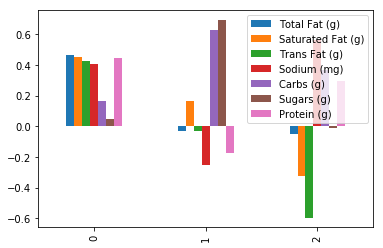

In [283]:
PCA_corr = PCA_DF.plot(kind = 'bar')
#plt.matshow(PCA_corr)
#plt.show()

In [280]:
ex_subset2 = ex_subset.drop(['Calories'], axis = 1)
ex_sc2 = StandardScaler()
ex_subset2_scaled = ex_sc2.fit_transform(ex_subset2)
ex_sub = pd.DataFrame(ex_subset2_scaled,columns=ex_subset2.columns)
ex_sub

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
0,-1.130777,-0.902325,-0.900493,-0.947089,-0.615045,-0.347728,-0.841296
1,-0.965655,-0.650066,-0.352116,-0.563455,-0.566124,-0.299970,-0.644933
2,-0.085007,-0.019420,0.196261,-0.026367,0.118769,-0.204452,-0.055844
3,-0.140048,0.232839,0.744638,0.242177,-0.174757,-0.156694,0.336882
4,0.630520,0.611226,0.744638,0.951900,0.314453,0.034341,0.925971
5,0.795641,1.115743,1.841393,0.587447,-0.125836,-0.156694,1.515059
6,-0.745493,-0.019420,0.196261,-1.560903,2.026687,2.374513,-0.906750
7,-0.360210,-0.839260,-0.900493,0.031178,0.510137,-0.156694,-0.055844
8,-1.075736,-1.028454,-0.900493,-0.294911,-0.125836,-0.252211,0.205973
9,-0.910615,-1.028454,-0.900493,-1.177269,-1.593465,-0.634280,-1.037659


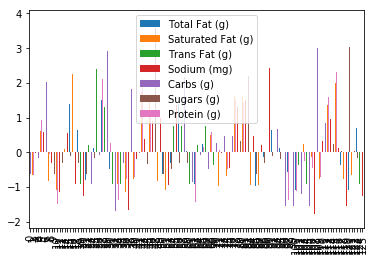

In [288]:
ex_s ub.plot(kind = 'bar')
#plt.matshow(ex_corr2)
#plt.show()